In [1]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

In [2]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


In [3]:
# Trains to 60-65% in 16 minutes with 5 x 600 and 50 epochs
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # Head
    layers.Flatten(input_shape=[128, 128, 3]),
    layers.Dense(60, activation='relu'),
    layers.Dense(60, activation='relu'),
    layers.Dense(60, activation='relu'),
    # layers.Dense(60, activation='relu'),
    # layers.Dense(60, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])

In [4]:
from shared import compile_and_fit
history = compile_and_fit(model, epochs=25)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.
Epoch 1/25
80/80 [==============================] - 7s 73ms/step - loss: 0.6707 - binary_accuracy: 0.5925 - val_loss: 0.6562 - val_binary_accuracy: 0.5805
Epoch 2/25
80/80 [==============================] - 2s 31ms/step - loss: 0.6536 - binary_accuracy: 0.6193 - val_loss: 0.6391 - val_binary_accuracy: 0.6248
Epoch 3/25
80/80 [==============================] - 2s 31ms/step - loss: 0.6488 - binary_accuracy: 0.6287 - val_loss: 0.6343 - val_binary_accuracy: 0.6337
Epoch 4/25
80/80 [==============================] - 2s 31ms/step - loss: 0.6405 - binary_accuracy: 0.6336 - val_loss: 0.6289 - val_binary_accuracy: 0.6442
Epoch 5/25
80/80 [==============================] - 2s 31ms/step - loss: 0.6335 - binary_accuracy: 0.6467 - val_loss: 0.6495 - val_binary_accuracy: 0.5868
Epoch 6/25
80/80 [==============================] - 2s 31ms/step - loss: 0.6330 - binary_accuracy: 0.6357 - val_loss: 0.6277 - val_binary_accur

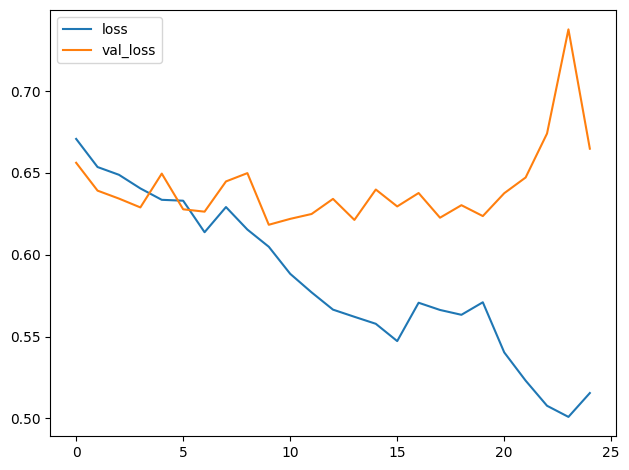

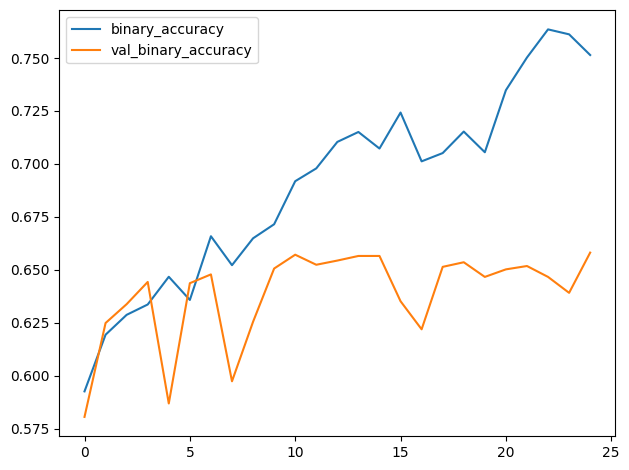

In [5]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [6]:
model.save('models/nn.keras')